In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [17]:
csvFile = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
train=csvFile[:500]
test=csvFile[500:892]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,500.000000,500.000000,500.000000,398.000000,500.000000,500.000000,500.000000
mean,250.500000,0.386000,2.326000,29.204774,0.574000,0.380000,31.782332
std,144.481833,0.487318,0.827704,14.597230,1.153771,0.780268,47.605955
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,125.750000,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,250.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.456250
75%,375.250000,1.000000,3.000000,37.750000,1.000000,0.000000,30.070800
max,500.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  500 non-null    int64  
 1   Survived     500 non-null    int64  
 2   Pclass       500 non-null    int64  
 3   Name         500 non-null    object 
 4   Sex          500 non-null    object 
 5   Age          398 non-null    float64
 6   SibSp        500 non-null    int64  
 7   Parch        500 non-null    int64  
 8   Ticket       500 non-null    object 
 9   Fare         500 non-null    float64
 10  Cabin        113 non-null    object 
 11  Embarked     499 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 47.0+ KB


<Axes: xlabel='Pclass', ylabel='count'>

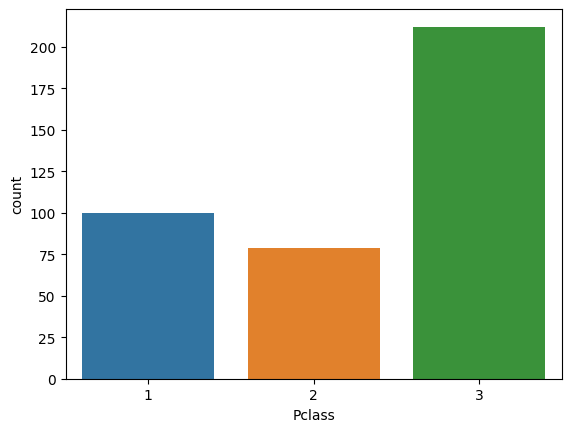

In [19]:
sns.countplot(test,x='Pclass')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


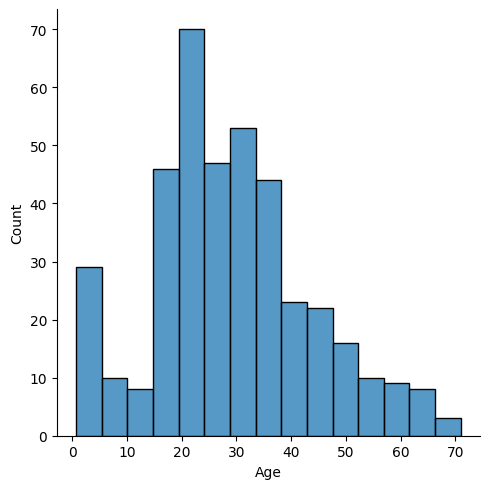

In [20]:
sns.displot(train,x='Age')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


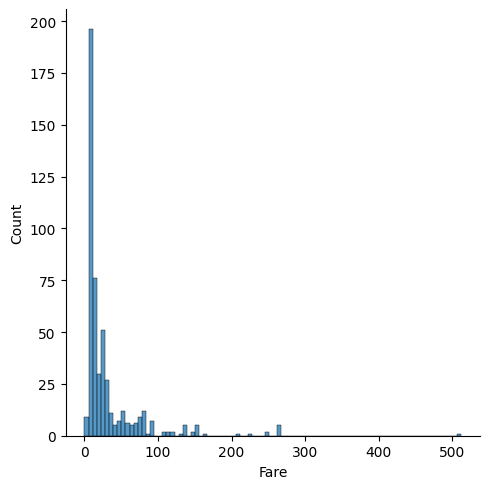

In [21]:
sns.displot(train['Fare'])

,Fare
Pclass,
1,86.891306
2,19.408134
3,13.526597


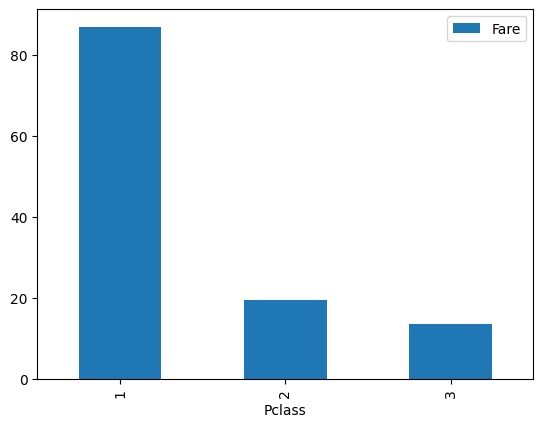

In [22]:
class_fare=train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
class_fare

In [23]:
csvFile.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
csvFile.drop(columns=['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [26]:
csvFile['Age']=csvFile['Age'].fillna(csvFile['Age'].mean())
csvFile['Embarked']=csvFile['Embarked'].fillna(csvFile['Embarked'].mode()[0])

/tmp/ipykernel_33/4275550925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(csvFile['Fare'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

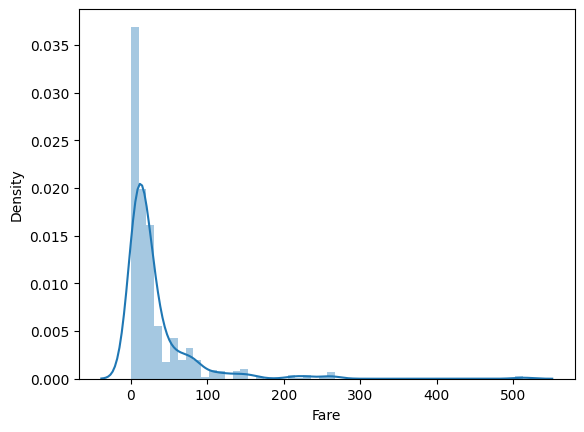

In [27]:
sns.distplot(csvFile['Fare'])

In [29]:
csvFile['Fare']=np.log(csvFile['Fare']+1)
csvFile['Fare']

0      1.134691
1      1.664038
2      1.159662
3      1.607603
4      1.164014
         ...   
886    1.291725
887    1.489299
888    1.434282
889    1.489299
890    1.153433
Name: Fare, Length: 891, dtype: float64

/tmp/ipykernel_33/4275550925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(csvFile['Fare'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

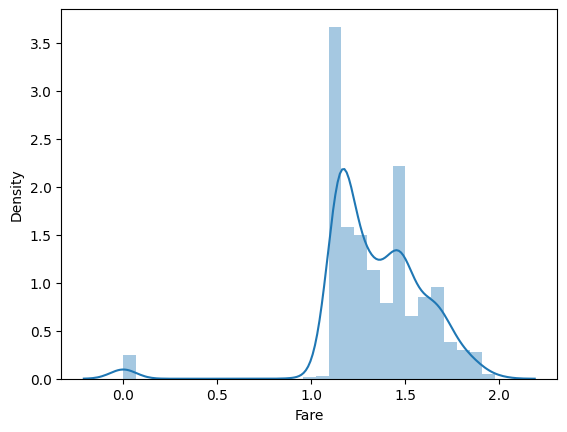

In [30]:
sns.distplot(csvFile['Fare'])

<Axes: >

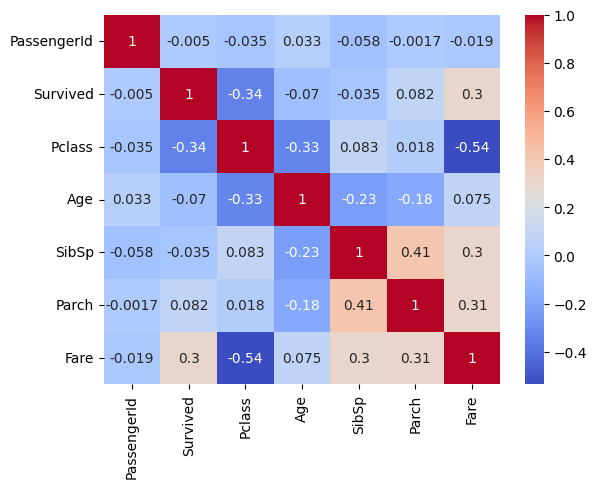

In [33]:
numeric_df = csvFile.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='Pclass', ylabel='Fare'>

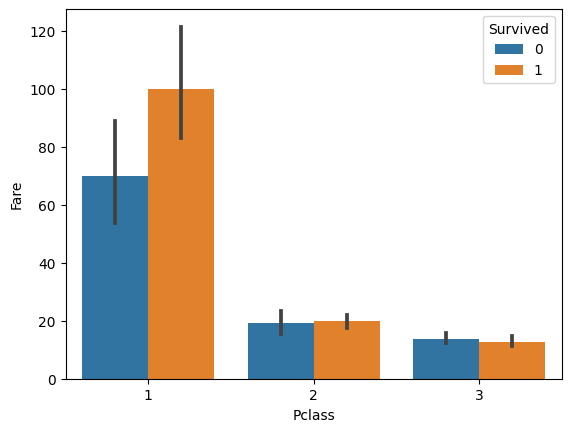

In [35]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')

In [36]:
csvFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.134691,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.664038,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.159662,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.607603,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1.164014,NaN,S


In [39]:
csvFile=csvFile.drop(columns=['Name','Ticket'],axis=1)
csvFile.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,1.134691,NaN,S
1,2,1,1,female,38.0,1,0,1.664038,C85,C
2,3,1,3,female,26.0,0,0,1.159662,NaN,S
3,4,1,1,female,35.0,1,0,1.607603,C123,S
4,5,0,3,male,35.0,0,0,1.164014,NaN,S


In [41]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()
for i in cols:
    csvFile[i]=le.fit_transform(csvFile[i])
csvFile.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,1.134691,NaN,2
1,2,1,1,0,38.0,1,0,1.664038,C85,0
2,3,1,3,0,26.0,0,0,1.159662,NaN,2
3,4,1,1,0,35.0,1,0,1.607603,C123,2
4,5,0,3,1,35.0,0,0,1.164014,NaN,2


In [43]:
train=csvFile[:800]
test=csvFile[800:]

In [52]:
x=train.drop(columns=['PassengerId','Survived','Cabin'])
y=train['Survived']
print(x.head())
print(y.head())

   Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0       3    1  22.0      1      0  1.134691         2
1       1    0  38.0      1      0  1.664038         0
2       3    0  26.0      0      0  1.159662         2
3       1    0  35.0      1      0  1.607603         2
4       3    1  35.0      0      0  1.164014         2
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [53]:
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('ACCURACY : ',model.score(x_test,y_test))
    score=cross_val_score(model,x,y,cv=5)
    print("csv Score : ",np.mean(score))
    

In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

ACCURACY :  0.855
csv Score :  0.7899999999999999


In [55]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

ACCURACY :  0.78
csv Score :  0.76875


In [56]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

ACCURACY :  0.805
csv Score :  0.805


In [59]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model)

ACCURACY :  0.795
csv Score :  0.79125


In [60]:
from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

ACCURACY :  0.81
csv Score :  0.8075000000000001


In [67]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 231, number of negative: 369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385000 -> initscore=-0.468379
[LightGBM] [Info] Start training from score -0.468379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [65]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(verbose=0)
classify(model)

ACCURACY :  0.85
csv Score :  0.8237500000000001


In [69]:
##MODEL

model=CatBoostClassifier(verbose=0)
model.fit(x,y)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,1.134691,NaN,2
1,2,1,1,0,38.0,1,0,1.664038,C85,0
2,3,1,3,0,26.0,0,0,1.159662,NaN,2
3,4,1,1,0,35.0,1,0,1.607603,C123,2
4,5,0,3,1,35.0,0,0,1.164014,NaN,2


In [76]:
x_test=csvFile.drop(columns=['PassengerId','Survived','Cabin'],axis=1)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,1.134691,2
1,1,0,38.0,1,0,1.664038,0
2,3,0,26.0,0,0,1.159662,2
3,1,0,35.0,1,0,1.607603,2
4,3,1,35.0,0,0,1.164014,2


In [77]:
pred=model.predict(x_test)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [78]:
temp=csvFile
temp['Survived']=pred
Final_predicted_result=temp
Final_predicted_result.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,1.134691,NaN,2
1,2,1,1,0,38.000000,1,0,1.664038,C85,0
2,3,1,3,0,26.000000,0,0,1.159662,NaN,2
3,4,1,1,0,35.000000,1,0,1.607603,C123,2
4,5,0,3,1,35.000000,0,0,1.164014,NaN,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,1.291725,NaN,2
887,888,1,1,0,19.000000,0,0,1.489299,B42,2
888,889,0,3,0,29.699118,1,2,1.434282,NaN,2
889,890,1,1,1,26.000000,0,0,1.489299,C148,0
